In [22]:
# Import required libs
import numpy as np
import pandas as pd

from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

# Load the data.
dataset = pd.read_csv('datasets/network-logs.csv')

In [7]:
samples = dataset.iloc[:, [1, 2]].values # Extracting features LATENCY and THROUGHTPUT
targets = dataset['ANOMALY'].values  # Extracting targets for predictions

In [8]:
# Divide data into testing and training sets (30%/70%)
training_samples, testing_samples, training_targets, testing_targets = train_test_split(
         samples, targets, test_size=0.3, random_state=0)

In [4]:
# Creates an instance of a K-Nearest Neighbors classifier.
# n_neighbors=2 tells the model to look at the 2 nearest neighbors (data points) when making a prediction.
knc = KNeighborsClassifier(n_neighbors=2)

# Trains the KNN classifier using the training data.
# In KNN, "training" mostly consists of storing the training data, since KNN is a lazy learner (it doesn't actually learn a model—it defers computation until prediction).
knc.fit(training_samples, training_targets)

# Uses the trained classifier to predict the class labels for the testing samples.
# Stores the predicted labels in knc_prediction.
knc_prediction = knc.predict(testing_samples)

# Evaluate the Accuracy in percent
knc_accuracy = 100.0 * accuracy_score(testing_targets, knc_prediction)
print (testing_targets)
print (knc_prediction)
print ("K-Nearest Neighbours accuracy: " + str(knc_accuracy))

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
K-Nearest Neighbours accuracy: 95.90163934426229


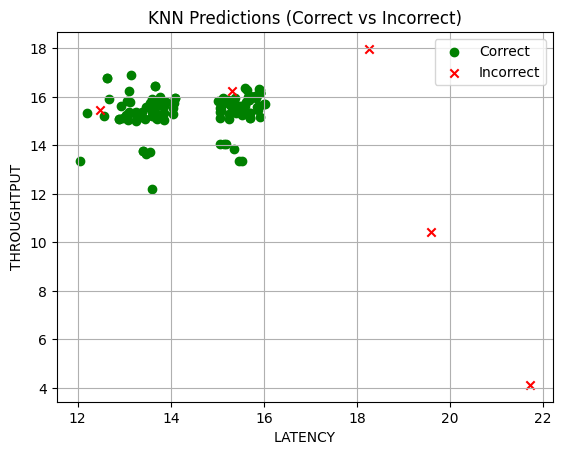

In [10]:
# Determine which predictions are correct
correct = knc_prediction == testing_targets

# Plot correct predictions
plt.scatter(testing_samples[correct, 0], testing_samples[correct, 1], c='green', label='Correct', marker='o')

# Plot incorrect predictions
plt.scatter(testing_samples[~correct, 0], testing_samples[~correct, 1], c='red', label='Incorrect', marker='x')

plt.xlabel('LATENCY')
plt.ylabel('THROUGHTPUT')
plt.title('KNN Predictions (Correct vs Incorrect)')
plt.legend()
plt.grid(True)
plt.show()

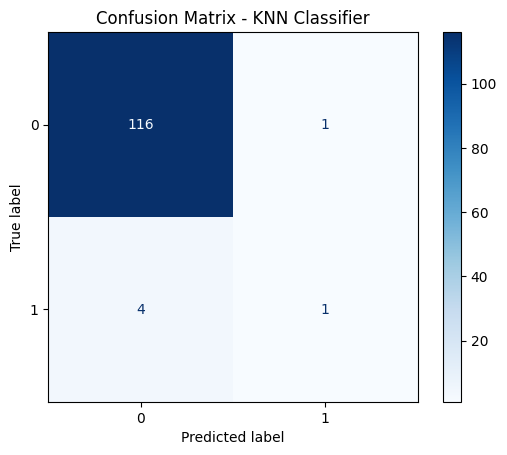

In [12]:
cm = confusion_matrix(testing_targets, knc_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - KNN Classifier')
plt.show()

In [13]:
# Creates a new instance of DecisionTreeClassifier.
# random_state=0: ensures consistent results every time the code is run (reproducibility).
# Decision Trees split the dataset into branches based on feature thresholds, creating a flowchart-like structure to make predictions.
dtc = DecisionTreeClassifier(random_state=0)

# Fits (trains) the model using your training features and labels.
dtc.fit(training_samples,training_targets)

# Uses the trained decision tree to predict labels for the unseen testing data.
dtc_prediction = dtc.predict(testing_samples)

# Evaluate Accuracy
dtc_accuracy = 100.0 * accuracy_score(testing_targets, dtc_prediction)
print (testing_targets)
print (dtc_prediction)
print ("Decision Tree accuracy: " + str(dtc_accuracy))

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
Decision Tree accuracy: 96.72131147540983


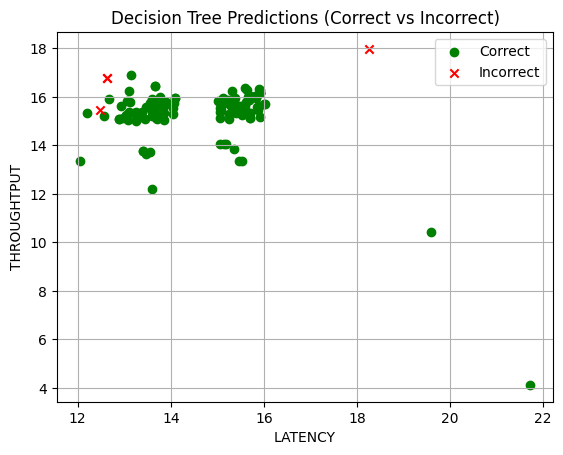

In [14]:
# Determine which predictions are correct
correct = dtc_prediction == testing_targets

# Plot correct predictions
plt.scatter(testing_samples[correct, 0], testing_samples[correct, 1], c='green', label='Correct', marker='o')

# Plot incorrect predictions
plt.scatter(testing_samples[~correct, 0], testing_samples[~correct, 1], c='red', label='Incorrect', marker='x')

plt.xlabel('LATENCY')
plt.ylabel('THROUGHTPUT')
plt.title('Decision Tree Predictions (Correct vs Incorrect)')
plt.legend()
plt.grid(True)
plt.show()

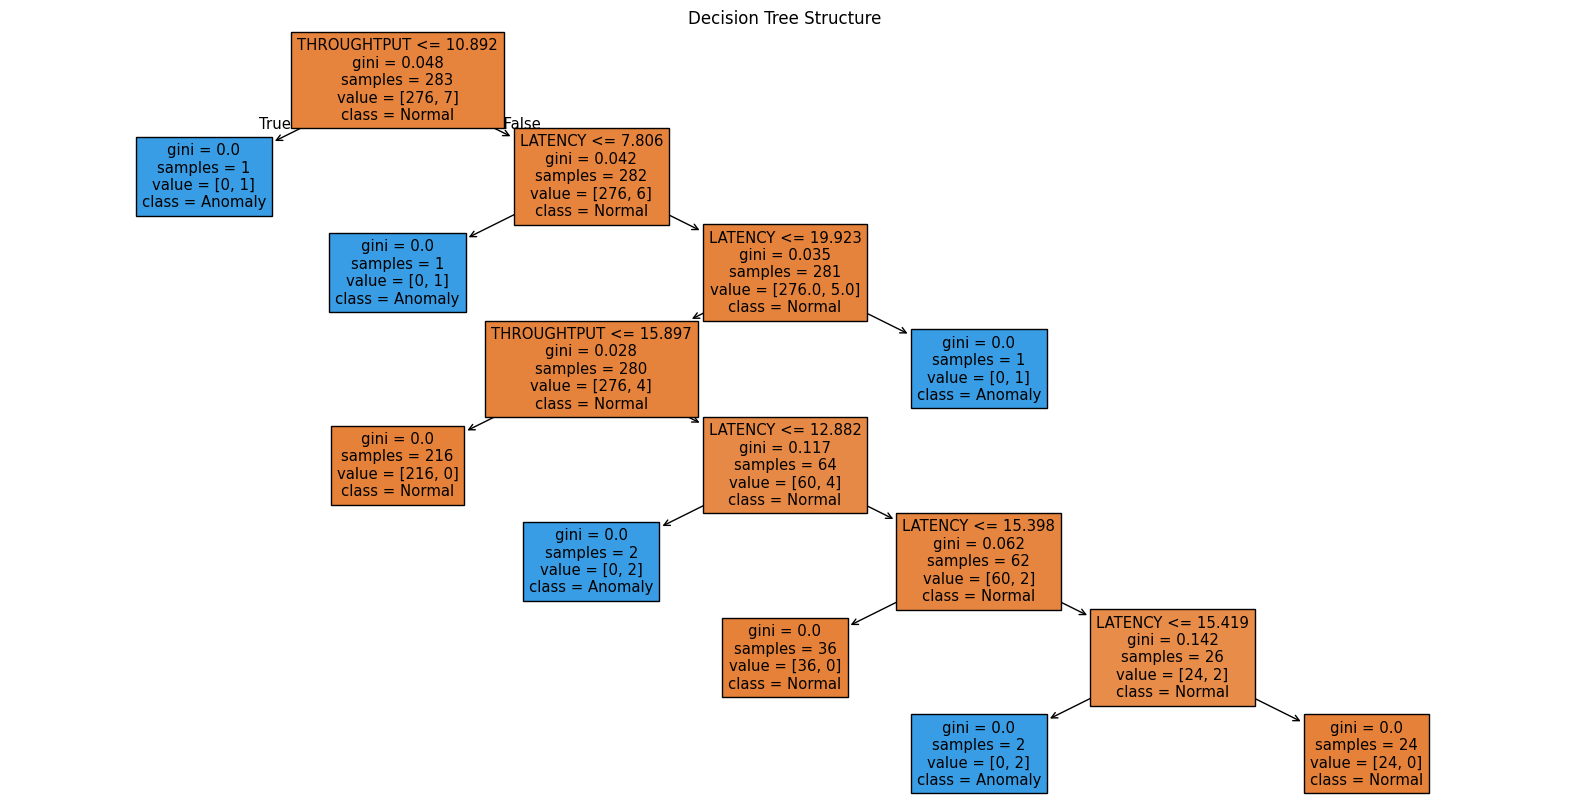

In [16]:
# Visualizing a prediction tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=['LATENCY', 'THROUGHTPUT'], class_names=['Normal', 'Anomaly'])
plt.title('Decision Tree Structure')
plt.show()

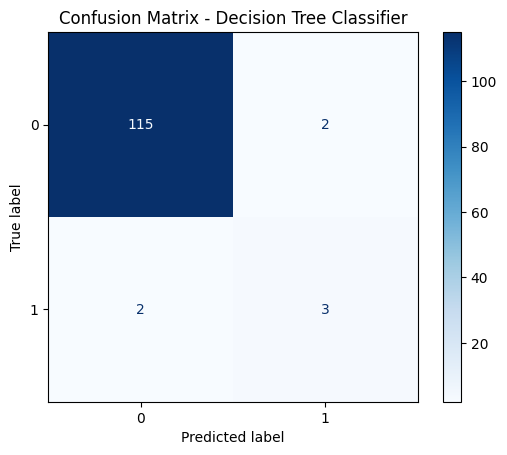

In [17]:
# Confusion matrix
cm = confusion_matrix(testing_targets, dtc_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

In [18]:
# Creates an instance of GaussianNB.
# Naive Bayes classifiers are based on Bayes’ theorem.
# Assumption: Features are independent of each other (hence "Naive"), and follow a Gaussian (Normal) distribution.
# Works very well when the data distribution matches these assumptions
gnb = GaussianNB()

# Train the Model
gnb.fit(training_samples,training_targets)

# Make Predictions
gnb_prediction = gnb.predict(testing_samples)

# Evaluate the Accuracy in percent
gnb_accuracy = 100.0 * accuracy_score(testing_targets, gnb_prediction)
print ("Gaussian Naive Bayes accuracy: " + str(gnb_accuracy))
print (testing_targets)
print (gnb_prediction)

Gaussian Naive Bayes accuracy: 98.36065573770492
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


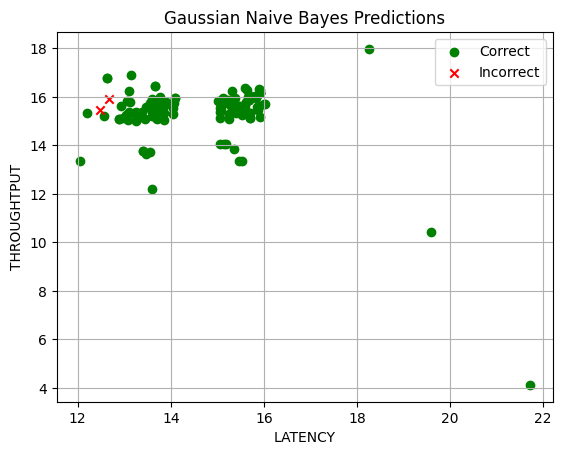

In [19]:
# Identify correct predictions
correct = gnb_prediction == testing_targets

# Scatter plot
plt.scatter(testing_samples[correct, 0], testing_samples[correct, 1], c='green', label='Correct', marker='o')
plt.scatter(testing_samples[~correct, 0], testing_samples[~correct, 1], c='red', label='Incorrect', marker='x')

plt.xlabel('LATENCY')
plt.ylabel('THROUGHTPUT')
plt.title('Gaussian Naive Bayes Predictions')
plt.legend()
plt.grid(True)
plt.show()

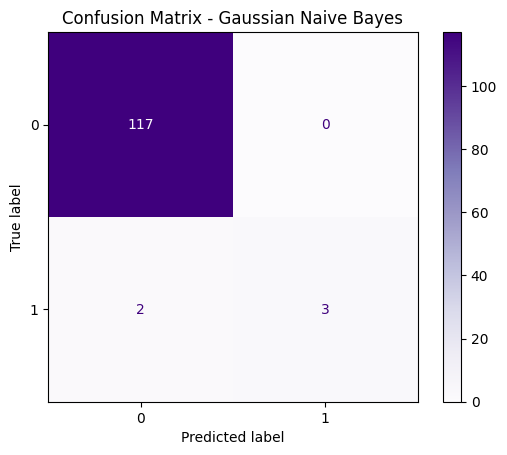

In [20]:
# Confusion matrix
cm = confusion_matrix(testing_targets, gnb_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()

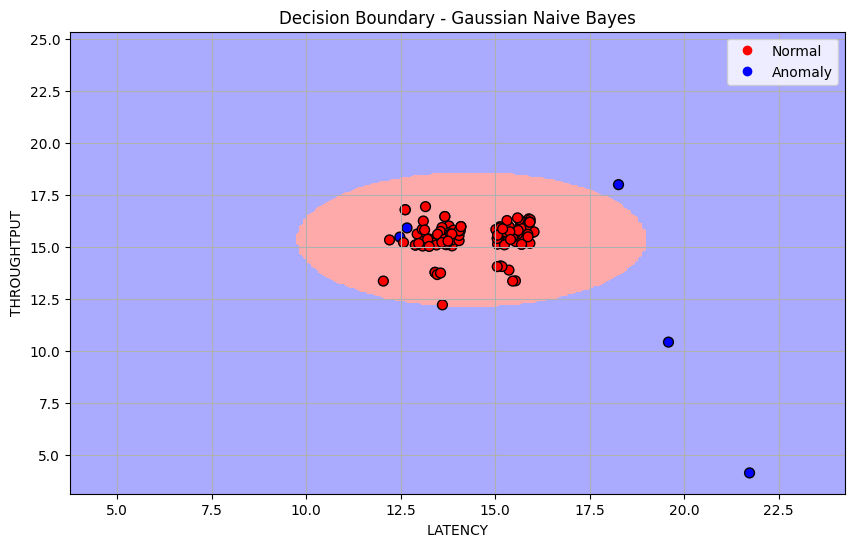

In [24]:
#Decision Boundary Plot

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])  # background colors
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])   # point colors

# Create meshgrid for feature space
x_min, x_max = samples[:, 0].min() - 1, samples[:, 0].max() + 1
y_min, y_max = samples[:, 1].min() - 1, samples[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict over the grid
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot test data points
scatter = plt.scatter(testing_samples[:, 0], testing_samples[:, 1], c=testing_targets, cmap=cmap_bold, edgecolor='k', s=50)

plt.xlabel('LATENCY')
plt.ylabel('THROUGHTPUT')
plt.title('Decision Boundary - Gaussian Naive Bayes')
plt.legend(handles=scatter.legend_elements()[0], labels=['Normal', 'Anomaly'])
plt.grid(True)
plt.show()

**Висновки**
Gaussian Naive Bayes показав найкращий результат, досягнувши найвищої точності (98,36%).
➔ Ймовірно, тому що розподіл даних добре відповідає нормальному (гаусовому) розподілу.

Decision Tree також продемонстрував високу точність (96,72%), трохи поступившись GNB.
➔ Дерева рішень можуть легко перенавчитися, якщо їх не налаштовувати, але тут модель показала хороший результат.

K-Nearest Neighbors досяг пристойної точності (95,90%), однак трохи нижчої за інші дві моделі.
➔ KNN може слабше працювати при наявності шуму або перекриття класів.

**Gaussian Naive Bayes є найкращою моделлю для цього набору даних серед протестованих, забезпечуючи найкращий баланс між простотою, швидкістю та точністю.**